In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
import numpy as np
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [3]:
INFILE_EL = './processed/l1/0617/8GeV_e_narrow_4sc_cher.hd5'
INFILE_PI = './processed/l1/0617/8GeV_pi_narrow_4sc_veto_cher_v3.hd5'

In [4]:
el_store = pd.HDFStore(INFILE_EL)
el_df = el_store['df']
el_store.close()

In [5]:
pi_store = pd.HDFStore(INFILE_PI)
pi_df = pi_store['df']
pi_store.close()
print pi_df

     isamp  adc     timestamp  index  voltage    charge
0        0   -1  1.497763e+09      0    -0.22  5.011377
1        4   -1  1.497763e+09      0    -0.22  5.011377
2        8    0  1.497763e+09      0     0.00  5.011377
3       12    1  1.497763e+09      0     0.22  5.011377
4       16    0  1.497763e+09      0     0.00  5.011377
5       20    1  1.497763e+09      0     0.22  5.011377
6       24   -1  1.497763e+09      0    -0.22  5.011377
7       28    0  1.497763e+09      0     0.00  5.011377
8       32   -2  1.497763e+09      0    -0.44  5.011377
9       36    0  1.497763e+09      0     0.00  5.011377
10      40    1  1.497763e+09      0     0.22  5.011377
11      44    0  1.497763e+09      0     0.00  5.011377
12      48   -2  1.497763e+09      0    -0.44  5.011377
13      52   -1  1.497763e+09      0    -0.22  5.011377
14      56   -5  1.497763e+09      0    -1.10  5.011377
15      60   -2  1.497763e+09      0    -0.44  5.011377
16      64   -2  1.497763e+09      0    -0.44  5

In [31]:
CHARGE_BINS = 16
el_charges = el_df['charge'].unique()
pi_charges = pi_df['charge'].unique()
c_max = np.max([np.max(el_charges), np.max(pi_charges)])
charge_binning = np.linspace(0, c_max, CHARGE_BINS+1)

In [32]:
el_split_charge = []
pi_split_charge = []
for ch_idx in xrange(CHARGE_BINS):
    el_split_charge.append(el_df[(el_df['charge'] > charge_binning[ch_idx]) & \
                                 (el_df['charge'] < charge_binning[ch_idx+1])])
    pi_split_charge.append(pi_df[(pi_df['charge'] > charge_binning[ch_idx]) & \
                                 (pi_df['charge'] < charge_binning[ch_idx+1])])

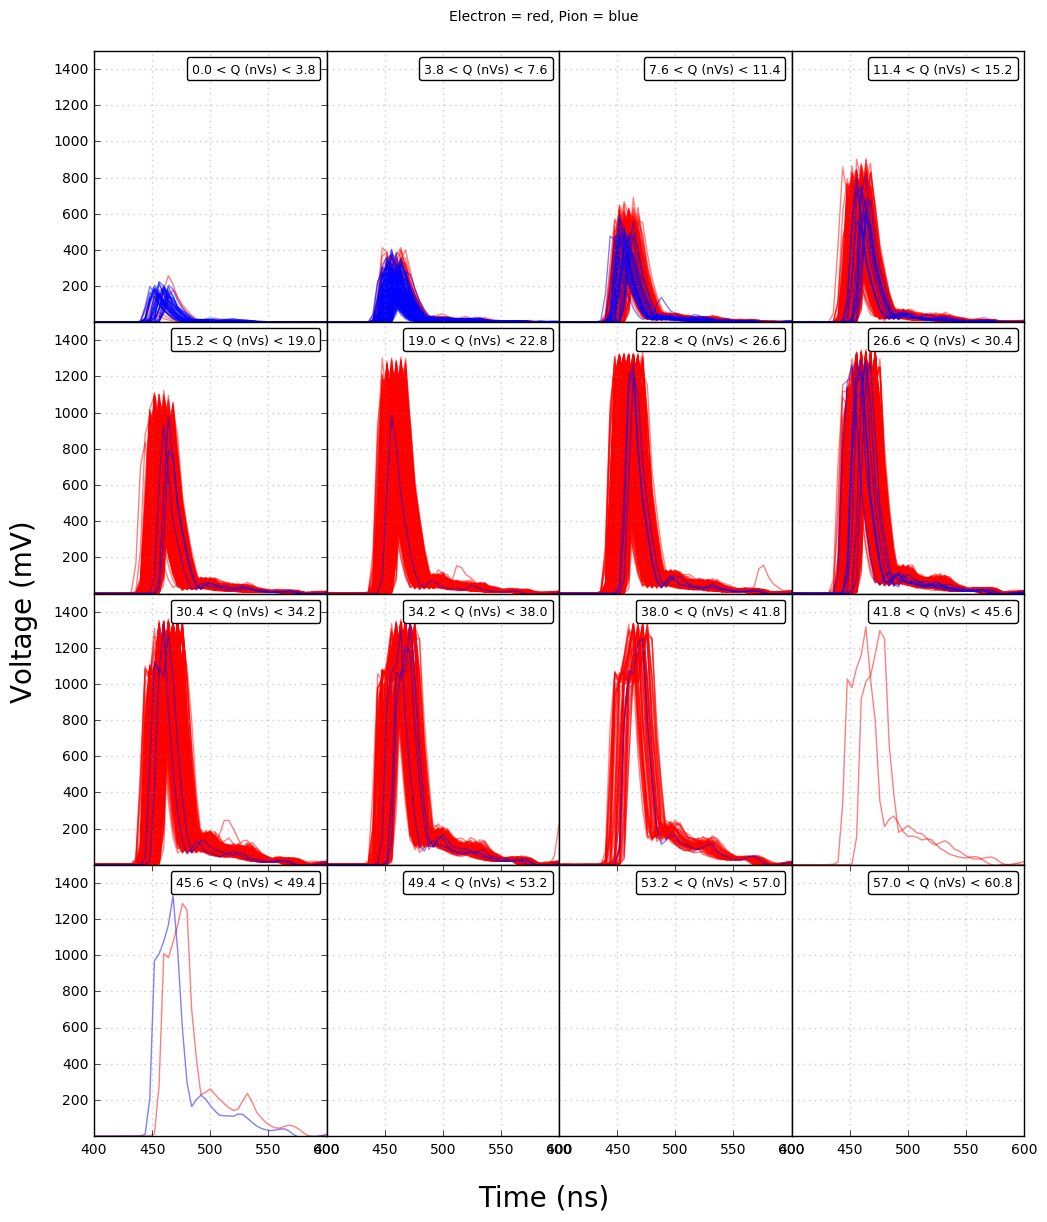

In [38]:
DIMS = (4, 4)

fig = plt.figure(figsize=[12, 14])
fig.suptitle(r'Electron = red, Pion = blue', y=0.93)
gs = gridspec.GridSpec(*DIMS)
gs.update(hspace=0., wspace=0.)
for ch_idx in xrange(CHARGE_BINS):
    #gs0 = gridspec.GridSpecFromSubplotSpec(
    #    1, 1, subplot_spec=gs[ch_idx], wspace=0, hspace=0, width_ratios=[1,1]
    #)
    ax0 = fig.add_subplot(gs[ch_idx])
    
    el_waveforms = el_split_charge[ch_idx]
    pi_waveforms = pi_split_charge[ch_idx]
    el_idx = el_waveforms['index'].unique()
    pi_idx = pi_waveforms['index'].unique()
    
    for idx in el_idx:
        wv_df = el_waveforms[el_waveforms['index'] == idx]
        isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        #ax0.scatter(isamp, voltage, marker='o', color='red')
        ax0.plot(isamp, voltage, color='red', alpha=0.5)
    for idx in pi_idx:
        wv_df = pi_waveforms[pi_waveforms['index'] == idx]
        isamp, voltage = np.array(wv_df['isamp']), np.array(wv_df['voltage'])
        #ax0.scatter(isamp, voltage, marker='o', color='blue')
        ax0.plot(isamp, voltage, color='blue', alpha=0.5)
    
    ax0.set_xlim(400, 600)
    ax0.set_ylim(0, 1500)
    
    for xmaj in ax0.xaxis.get_majorticklocs():
        ax0.axvline(x=xmaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    if ch_idx < CHARGE_BINS - DIMS[1]:
        ax0.get_xaxis().set_ticks([])
    xticks = ax0.yaxis.get_major_ticks()
    xticks[0].set_visible(False)
        
    for ymaj in ax0.yaxis.get_majorticklocs():
        ax0.axhline(y=ymaj, ls=':', color='gray', alpha=0.4, linewidth=1)
    yticks = ax0.yaxis.get_major_ticks()
    yticks[0].set_visible(False)
    if ch_idx % DIMS[1] != 0:
        ax0.get_yaxis().set_ticks([])
    
    at = AnchoredText(r'{0:.1f} < Q (nVs) < {1:.1f}'.format(charge_binning[ch_idx], charge_binning[ch_idx+1]),
                      prop=dict(size=9), frameon=True, loc=1)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax0.add_artist(at)

fig.text(0.055, 0.5, r'Voltage (mV)', rotation='vertical', va='center', size=20)
fig.text(0.5, 0.075, r'Time (ns)', ha='center', size=20)